## Purpose

The purpose of this script is to **predict daily bike rental counts** using a **linear regression model**. It applies **supervised machine learning** to forecast the total number of rentals (cnt) based on environmental features such as temperature, humidity, and wind speed.

## Dataset Information

* Source: UCI Machine Learning Repository
* File Used: day.csv (data aggregated on a daily basis)
* Key Columns in Use:
    * temp: Normalized temperature in Celsius
    * hum: Normalized humidity
    * windspeed: Normalized wind speed
    * cnt: Total count of bike rentals (target variable)

## Feature Selection

* Uses only three continuous variables for prediction:
    * **temp** (temperature)
    * **hum** (humidity)
    * **windspeed**
* These are selected from a larger dataset containing many other variables.

## Import Libraries

Standard libraries for data manipulation, visualization, modeling, and evaluation.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Load Dataset

Reads the CSV dataset into a DataFrame.

In [2]:
# Load dataset
df_day = pd.read_csv("Dataset/day.csv")

# Show the first few rows
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Summary of the dataset
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Define Features and Target

* X: Predictor variables (features)
* y: Target variable (bike rentals)

In [4]:
# Feature and target
X = df_day[['temp', 'hum', 'windspeed']]
y = df_day['cnt']

## Split into Train and Test

* Splits the dataset into 80% training and 20% testing.
* random_state=42 ensures reproducibility.

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Linear Regression Model

Trains a **Linear Regression model** using the selected features.

In [6]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make Predictions

Predicts sales for the test dataset.

In [7]:
# Predictions
y_pred = model.predict(X_test)

## Evaluate the Model

* **R² Score:** Indicates how well the model explains the variance (1 = perfect, 0 = no explanatory power).
* **MSE:** Mean squared error, measures average squared difference between actual and predicted values.

In [8]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.4960644511193125
MSE: 2020722.2320442533


## Visualization

* Scatter plot showing the relationship between actual and predicted values.
* A perfect model would place all points along the 45° diagonal.

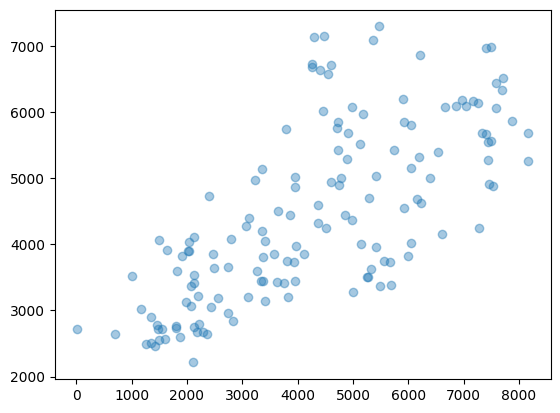

In [9]:
# Visualization
plt.scatter(y_test, y_pred, alpha=0.4)